In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Square Root
Find sqare root of 10 =$\displaystyle 10^{\frac {1}{2}}$

x=       10.00000


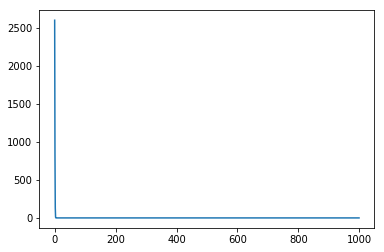

In [4]:
#Init
learningRate=0.001

w=7
########################
hx=w**2  #Hypothesis
X=[]  #No input
Y=100 #Actual output
#####################
costs=[]
for i in range(1000): 
    #Forward
    yhat=w**2
    
    #Cost
    cost=(yhat-Y)**2
    
    #Back
    dw=2*(yhat-Y) *(2*w)
    
    #Update
    w=w-0.001*dw    
    costs.append(cost)
plt.plot(costs)
print("x=%15.5f" % w)

# One Fifth Root
Find fifth root of 32= $\displaystyle 32^{\frac {1}{5}}$

x=        2.00000


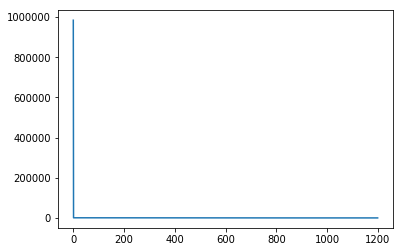

In [5]:
w=1
hx=w**5  #Hypothesis
X=[]  #No input
Y=32 #Actual output


learningRate=0.000001
#Init
w=4

costs=[]
for i in range(1200): 
    #Forward
    yhat=w**5
    
    #Cost
    cost=(yhat-Y)**2
    
    #Back
    dw=2*(yhat-Y) *(5*w**4)
    
    #Update
    w=w-learningRate*dw    
    costs.append(cost)
plt.plot(costs)
print("x=%15.5f" % w)

In [76]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
#tf.enable_eager_execution()

In [77]:
def create_placeholders():
    X = tf.placeholder(dtype=tf.float32, shape=[1,1], name="X")
    Y = tf.placeholder(dtype=tf.float32, shape=[1,1], name="Y")
    return X,Y

In [78]:
def initialize_parameters():  
    tf.set_random_seed(1)                   
    W = tf.get_variable("W",[1,1],initializer=tf.initializers.random_normal())
    parameters = {"W": W}
    return parameters

In [79]:
def forward_propagation(X, parameters):
    W = parameters['W']    
    Z = tf.math.pow(W, 2)  
    return Z

In [80]:
def compute_cost(Z, Y):
    CV   = tf.math.pow((Z-Y),2) 
    cost = tf.reduce_mean(CV)
    return cost

In [81]:
def backward_propagation(cost, learning_rate):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    return optimizer

In [109]:
def model(X_train, Y_train, learning_rate, iterations):
    ops.reset_default_graph() 
    costs = []                                        # To keep track of the cost

    X, Y = create_placeholders()

    # Initialize parameters
    parameters = initialize_parameters()

    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z = forward_propagation(X, parameters)

    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z, Y)

    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    op = backward_propagation(cost,learning_rate=lr)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer()) # Initialize all the variables
        for i in range(iterations):       
            _ , c = sess.run([op, cost],feed_dict={X: X_train, Y: Y_train})                

            costs.append(c)
        parameters = sess.run(parameters)  #Evaluate Values  

    return parameters,costs

In [116]:
def FindSQRT(SqRootOf,printModel=False):
    lr=0.001
    parameters,costs =model([[0]],[[SqRootOf]],0.001,1200)
    SQRTValue=np.round(np.squeeze(parameters["W"]),2)
    
    if(printModel==True):
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations')
        plt.title("Learning rate =" + str(lr))
        plt.show()

    return SQRTValue
    

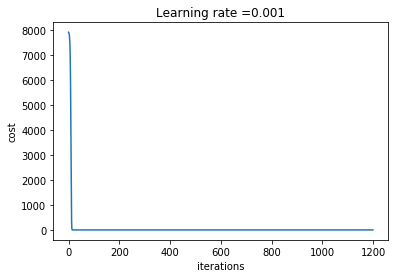

9.43


In [117]:
print(FindSQRT(89,True))